In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [53]:
def my_mean(x, w):
    return np.sum( x*np.power(w, -2) ) / np.sum( np.power(w, -2) )

def my_cov(x, y, w):
    return my_mean(x*y, w) - my_mean(x, w)*my_mean(y, w)

def my_var(x, w):
    return my_cov(x, x, w)

In [54]:
def inc_fit(yerr,N,t,t_):
    x_m=np.mean(t)
    x_var=pow(np.std(t),2)
    yerr2=pow(yerr,2)
    t__=t_-x_m
    err=np.sqrt(yerr2/N+yerr2/(N*np.fabs(x_var))*pow(t__,2))
    return err,x_var,x_m

In [55]:
def my_fit(x, y, sd_y, verbose=True):
    m = my_cov(x, y, sd_y) / my_var(x, sd_y)
    var_m = 1 / ( my_var(x, sd_y) * np.sum( np.power(sd_y, -2)) )
    c = my_mean(y,sd_y) - my_mean(x,sd_y) * m
    var_c = my_mean(x*x, sd_y)  / ( my_var(x, sd_y) * np.sum( np.power(sd_y, -2)))
    cov_mc = - my_mean(x, sd_y) / ( my_var(x, sd_y) * np.sum( np.power(sd_y, -2))) 
   
    return m, np.sqrt(var_m), c, np.sqrt(var_c), cov_mc

In [56]:
zero_gradi=pd.read_csv('0_gradi.csv',sep=';')  
gravita = pd.read_csv('CL.csv',sep=';')
tre_gradi=pd.read_csv('3_gradi.csv',sep=';')
due_gradi=pd.read_csv('2_gradi.csv',sep=';')
due_gradi_a=pd.read_csv('2_gradi_appr.csv',sep=';')
cinque_gradi=pd.read_csv('5_gradi.csv',sep=';')
sette_gradi=pd.read_csv('7_gradi.csv',sep=';')

In [57]:
t0=zero_gradi.iloc[:,0]
r0=zero_gradi.iloc[:,1]
v0=zero_gradi.iloc[:,2]

tg=gravita.iloc[0:8,0]
rg=gravita.iloc[0:8,1]
vg=gravita.iloc[0:8,2]

t3=tre_gradi.iloc[0:35,0]
r3=tre_gradi.iloc[0:35,1]
v3=tre_gradi.iloc[0:35,2]

t2=due_gradi.iloc[0:106,0]
r2=due_gradi.iloc[0:106,1]
v2=due_gradi.iloc[0:106,2]

t2a=due_gradi_a.iloc[0:35,0]
r2a=due_gradi_a.iloc[0:35,1]
v2a=due_gradi_a.iloc[0:35,2]

t5=cinque_gradi.iloc[0:33,0]
r5=cinque_gradi.iloc[0:33,1]
v5=cinque_gradi.iloc[0:33,2]

t7=sette_gradi.iloc[0:28,0]
r7=sette_gradi.iloc[0:28,1]
v7=sette_gradi.iloc[0:28,2]

In [58]:
t0=np.array(t0)
r0=np.array(r0)
v0=np.array(v0)

tg=np.array(tg)
rg=np.array(rg)
vg=np.array(vg)

t3=np.array(t3)
r3=np.array(r3)
v3=np.array(v3)

t2=np.array(t2)
r2=np.array(r2)
v2=np.array(v2)

t2a=np.array(t2a)
r2a=np.array(r2a)
v2a=np.array(v2a)

t5=np.array(t5)
r5=np.array(r5)
v5=np.array(v5)

t7=np.array(t7)
r7=np.array(r7)
v7=np.array(v7)

## VALUTAZIONE INCERTEZZE

si considera un'incertezza uguale per tutti gli ri valutata sulla base della precisione dell'autotracker, si è ritenuto opportuno considerare che la misura può essere imprecisa con una deviazione standard su ri pari al raggio della pallina fratto 3 (R palla= 0.015m,R biglia = 0.011m). 
Si ha quindi:
.$v=\frac{r_{i+1} - r{i}}{t_{i+1}-t_{i}}$ 
e una deviazione standard data da:
.$\sigma(v) = \frac{\sqrt{2}R}{3/30}$

In [59]:
raggio_g=0.015
raggio_b=0.011
vinc_g=raggio_g*np.sqrt(2)/(3/30)
vinc=raggio_b*np.sqrt(2)/(3/30)
inc_v=[vinc_g,vinc_g,vinc_g,vinc_g,vinc_g,vinc_g,vinc_g,vinc_g]
inc_v=np.array(inc_v)
m,sig_m,c,sig_c,cov_mc=my_fit(tg,vg,inc_v)
t_=np.linspace(0.13,0.37,50)
a,k,b=inc_fit(vinc_g,8,tg,t_)
m,sig_m

(10.53151880857621, 0.9812728429688566)

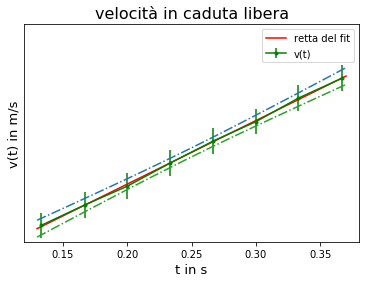

In [60]:
plt.errorbar(tg,vg,inc_v,color='green',marker='o',ms=3,label='v(t)')
plt.xlabel('t in s',fontsize=13)
plt.ylabel('v(t) in m/s',fontsize=13)
plt.title('velocità in caduta libera',fontsize=16)
plt.ylim(1.4,5)
v_=m*t_+c
v_sup=m*t_+c+a
v_inf=m*t_+c-a
plt.plot(t_,v_,color='red',label='retta del fit')
plt.plot(t_,v_sup,'-.','orange')
plt.plot(t_,v_inf,'-.','orange')
plt.xlim(0.12,0.38)
plt.legend()

### studio caso a zero gradi

In [61]:
inc_v0=[vinc,vinc,vinc,vinc,vinc,vinc,vinc,vinc,vinc,vinc,vinc,vinc,vinc,vinc,vinc,vinc,vinc,vinc,vinc,vinc,vinc,vinc,vinc,vinc,vinc,vinc,vinc,vinc,vinc,vinc,vinc,vinc,vinc,vinc,vinc,vinc,vinc,vinc,vinc,vinc,vinc,vinc,vinc,vinc,vinc,vinc,vinc,vinc,vinc,vinc,vinc,vinc,vinc,vinc,vinc,vinc,vinc,vinc,vinc,vinc,vinc,vinc,vinc,vinc,vinc,vinc,vinc,vinc,vinc,vinc,vinc,vinc]
inc_v0=np.array(inc_v0)
acc_0,sig_acc_0,c_acc_0,sig_c_acc_0,cov_acc_0=my_fit(t0,v0,inc_v0)

### calcolo di $\delta$ a zero gradi

In [75]:
R=0.0125
g=9.81
delta=-7/5*acc_0*R/g
sig_delta=7/5*sig_acc_0*R/g

In [76]:
delta,sig_delta

(0.00015562606308970362, 4.441715943314248e-05)

### super fit lineare del fit lineare

In [77]:
inc_v3=[vinc,vinc,vinc,vinc,vinc,vinc,vinc,vinc,vinc,vinc,vinc,vinc,vinc,vinc,vinc,vinc,vinc,vinc,vinc,vinc,vinc,vinc,vinc,vinc,vinc,vinc,vinc,vinc,vinc,vinc,vinc,vinc,vinc,vinc,vinc]
inc_v3=np.array(inc_v3)
acc_3,sig_acc_3,c_acc_3,sig_c_acc_3,cov_acc_3=my_fit(t3,v3,inc_v3)

In [78]:
inc_v2=[vinc,vinc,vinc,vinc,vinc,vinc,vinc,vinc,vinc,vinc,vinc,vinc,vinc,vinc,vinc,vinc,vinc,vinc,vinc,vinc,vinc,vinc,vinc,vinc,vinc,vinc,vinc,vinc,vinc,vinc,vinc,vinc,vinc,vinc,vinc,vinc,vinc,vinc,vinc,vinc,vinc,vinc,vinc,vinc,vinc,vinc,vinc,vinc,vinc,vinc,vinc,vinc,vinc,vinc,vinc,vinc,vinc,vinc,vinc,vinc,vinc,vinc,vinc,vinc,vinc,vinc,vinc,vinc,vinc,vinc,vinc,vinc,vinc,vinc,vinc,vinc,vinc,vinc,vinc,vinc,vinc,vinc,vinc,vinc,vinc,vinc,vinc,vinc,vinc,vinc,vinc,vinc,vinc,vinc,vinc,vinc,vinc,vinc,vinc,vinc,vinc,vinc,vinc,vinc,vinc,vinc]
inc_v2=np.array(inc_v2)
acc_2,sig_acc_2,c_acc_2,sig_c_acc_2,cov_acc_2=my_fit(t2,v2,inc_v2)

In [79]:
inc_v2a=[vinc,vinc,vinc,vinc,vinc,vinc,vinc,vinc,vinc,vinc,vinc,vinc,vinc,vinc,vinc,vinc,vinc,vinc,vinc,vinc,vinc,vinc,vinc,vinc,vinc,vinc,vinc,vinc,vinc,vinc,vinc,vinc,vinc,vinc,vinc]
inc_v2a=np.array(inc_v2a)
acc_2a,sig_acc_2a,c_acc_2a,sig_c_acc_2a,cov_acc_2a=my_fit(t2a,v2a,inc_v2a)

In [80]:
inc_v5=[vinc,vinc,vinc,vinc,vinc,vinc,vinc,vinc,vinc,vinc,vinc,vinc,vinc,vinc,vinc,vinc,vinc,vinc,vinc,vinc,vinc,vinc,vinc,vinc,vinc,vinc,vinc,vinc,vinc,vinc,vinc,vinc,vinc]
inc_v5=np.array(inc_v5)
acc_5,sig_acc_5,c_acc_5,sig_c_acc_5,cov_acc_5=my_fit(t5,v5,inc_v5)

In [81]:
inc_v7=[vinc,vinc,vinc,vinc,vinc,vinc,vinc,vinc,vinc,vinc,vinc,vinc,vinc,vinc,vinc,vinc,vinc,vinc,vinc,vinc,vinc,vinc,vinc,vinc,vinc,vinc,vinc,vinc]
inc_v7=np.array(inc_v7)
acc_7,sig_acc_7,c_acc_7,sig_c_acc_7,cov_acc_7=my_fit(t7,v7,inc_v7)

In [82]:
theta=[0.0523,0.0873,0.1222]
acc=[acc_3,acc_5,acc_7]
sig_acc=[sig_acc_3,sig_acc_5,sig_acc_7]
theta=np.array(theta)
acc=np.array(acc)
sig_acc=np.array(sig_acc)

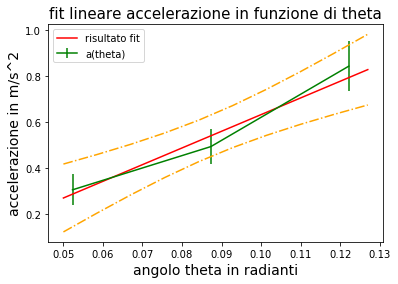

In [87]:
coeff,sig_coeff,cost,sig_cost,cov_tot=my_fit(theta,acc,sig_acc)
x=np.linspace(0.05,0.127,10)
y=coeff*x+cost
a,k,b=inc_fit(vinc,3,theta,x)
y_sup=y+a
y_inf=y-a
plt.errorbar(theta,acc,sig_acc,color='green',label='a(theta)')
plt.plot(x,y,'red',label='risultato fit')
plt.plot(x,y_sup,'-.',color='orange')
plt.plot(x,y_inf,'-.',color='orange')
plt.title('fit lineare accelerazione in funzione di theta',fontsize=15)
plt.ylabel('accelerazione in m/s^2',fontsize=14)
plt.xlabel('angolo theta in radianti',fontsize=14)
plt.legend()

In [88]:
coeff,sig_coeff,cost,sig_cost,cov_tot=my_fit(theta,acc,sig_acc)

### stima di $\delta$ e I0 dal coeff. angolare e dalla costante

In [89]:
m=0.013
R=0.011
g=9.80
I0=m*pow(R,2)*(g/coeff-1)
I0_teo=2/5*m*pow(R,2)
sig_I0=m*R*R*g/pow(coeff,2)*sig_coeff

In [90]:
I0,I0_teo,sig_I0

(5.505099131838422e-07, 6.291999999999999e-07, 5.131749107274863e-07)

In [91]:
delta_fit=-cost/g*(R+I0/(m*R))
sig_delta_fit=np.sqrt(pow((R/g+I0/(m*R)),2)*pow(sig_cost,2) + pow(cost/(g*m*R),2)*pow(sig_I0,2))

In [92]:
sig_delta_fit,delta_fit

(0.0007125133129480886, 0.00014342051667774245)

In [93]:
g_fit=7/5*coeff

In [94]:
sig_g_fit=7/5*sig_coeff

In [95]:
g_fit,sig_g_fit

(10.163154815529973, 2.456063912293913)